 # Sweep Results Analysis
## Basic analysis of sweep1.csv.

In [4]:
pip install pandas matplotlib seaborn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------------------- ------------------- 5.5/11.0 MB 31.0 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 33.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 24.4 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sweep1.csv')
df.head()

,Name,totalWells,Runtime,eliteSize,mutationRate,numGenerations,populationSize,tournamentSize,finalMSE,monetaryCost,timeCost
0,sparkling-sweep-176,13.0,966,3,0.10,200,50,4,0.121415,363568.957325,36356.895732
1,hopeful-sweep-208,13.0,445,3,0.15,200,20,3,0.121445,363141.295069,36314.129507
2,decent-sweep-210,13.0,797,3,0.15,200,20,6,0.121442,363139.228566,36313.922857
3,vague-sweep-268,13.0,1074,4,0.10,100,100,3,0.120951,363627.988401,36362.798840
4,olive-sweep-123,13.0,562,3,0.05,100,50,6,0.119545,361441.061352,36144.106135


In [6]:
df.describe()

,totalWells,Runtime,eliteSize,mutationRate,numGenerations,populationSize,tournamentSize,finalMSE,monetaryCost,timeCost
count,270.000000,324.000000,324.00000,324.000000,324.000000,324.000000,324.000000,270.000000,270.000000,270.000000
mean,14.518519,976.604938,3.00000,0.100000,125.000000,56.666667,4.333333,0.117645,404590.029751,40459.002975
std,2.786990,3693.078788,0.81776,0.040888,55.988168,33.049358,1.249148,0.006635,75495.137411,7549.513741
min,13.000000,8.000000,2.00000,0.050000,50.000000,20.000000,3.000000,0.086690,360530.341403,36053.034140
25%,13.000000,255.000000,2.00000,0.050000,87.500000,20.000000,3.000000,0.116843,363436.746183,36343.674618
50%,13.000000,533.000000,3.00000,0.100000,125.000000,50.000000,4.000000,0.121043,363753.510301,36375.351030
75%,15.000000,1057.250000,4.00000,0.150000,162.500000,100.000000,6.000000,0.121415,417963.872083,41796.387208
max,28.000000,65445.000000,4.00000,0.150000,200.000000,100.000000,6.000000,0.121580,772185.989090,77218.598909


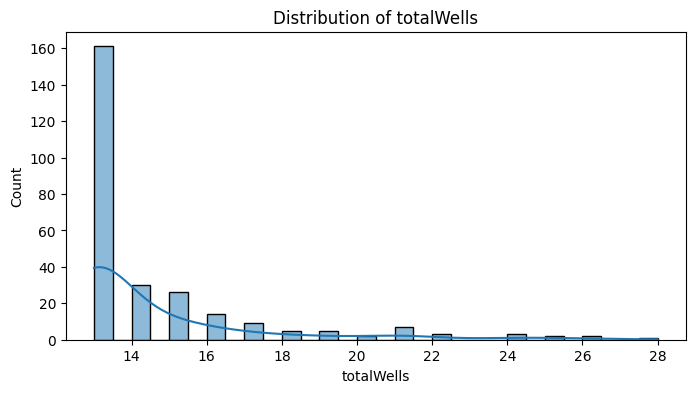

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['totalWells'], bins=30, kde=True)
plt.title('Distribution of totalWells')
plt.xlabel('totalWells')
plt.ylabel('Count')
plt.show()

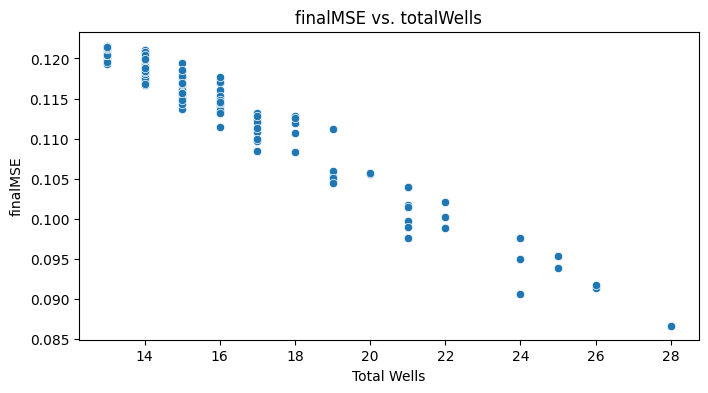

In [8]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='totalWells', y='finalMSE', data=df)
plt.title('finalMSE vs. totalWells')
plt.xlabel('Total Wells')
plt.ylabel('finalMSE')
plt.show()

In [10]:
grouped = df.groupby('totalWells')[['eliteSize', 'mutationRate', 'numGenerations', 'populationSize', 'tournamentSize', 'finalMSE', 'monetaryCost', 'timeCost']].mean().reset_index()
grouped

,totalWells,eliteSize,mutationRate,numGenerations,populationSize,tournamentSize,finalMSE,monetaryCost,timeCost
0,13.0,2.888199,0.101553,154.347826,66.956522,4.397516,0.121224,363372.121909,36337.212191
1,14.0,3.133333,0.093333,100.000000,56.333333,3.933333,0.118692,390565.219478,39056.521948
2,15.0,2.961538,0.100000,90.384615,40.769231,4.307692,0.116332,417874.560243,41787.456024
3,16.0,2.714286,0.085714,71.428571,40.714286,4.785714,0.114994,444990.691638,44499.069164
4,17.0,3.444444,0.094444,77.777778,26.666667,3.444444,0.111226,471805.274638,47180.527464
5,18.0,3.600000,0.080000,60.000000,44.000000,3.800000,0.111282,500714.060506,50071.406051
6,19.0,3.200000,0.130000,50.000000,26.000000,5.600000,0.106434,527240.760034,52724.076003
7,20.0,3.500000,0.075000,75.000000,20.000000,4.000000,0.105672,552663.719621,55266.371962
8,21.0,3.285714,0.092857,50.000000,20.000000,4.571429,0.101041,578504.644670,57850.464467
9,22.0,2.666667,0.116667,50.000000,20.000000,3.000000,0.100399,609168.566296,60916.856630
